# Libraries

In [3]:
source("tools.R")
library('DescTools')

# Prior likelihoods

### Preparing the data

In [4]:
data_prior <- read_csv("data/for_composititional_analysis_prior.csv")

dict_prior <- data_prior %>%                        
                        group_by(id, pid, scenario) %>%
                        summarize()

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  id = col_integer(),
  pid = col_character(),
  scenario = col_character(),
  x = col_integer(),
  y = col_double()
)


In [5]:
lmls_prior <- read_csv("output/lmls_prior.csv")

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  l = col_double(),
  `l*p` = col_double(),
  `l*p+r` = col_double(),
  `l*r` = col_double(),
  `l*r*p` = col_double(),
  `l*r+p` = col_double(),
  `l+p` = col_double(),
  `l+r` = col_double(),
  `l+r*p` = col_double(),
  `l+r+p` = col_double(),
  p = col_double(),
  `p*r` = col_double(),
  `p+r` = col_double(),
  r = col_double()
)


In [6]:
lmls_prior %>% head

X1,l,l*p,l*p+r,l*r,l*r*p,l*r+p,l+p,l+r,l+r*p,l+r+p,p,p*r,p+r,r
1,-713.6954,-8.438396e-02,-146.6802,-851.89829,-851.89688,-322.6189,791.0454,821.78723,927.2291,-323.47298,-323.0216,804.48813,-548.3215,792.3592
10,-1097.0542,-1.097054e+03,-10196.9489,-68.44092,-2035.82151,141.9539,148.8720,148.07899,-10196.9489,1468.08628,1537.9242,-51685.97435,1516.7239,1540.7145
100,-1196.2895,-1.196289e+03,60.4096,-94.76571,-98.14110,815.7817,-245.2160,899.05122,818.8646,65.02978,-761.1522,69.69232,994.7514,855.1832
101,-884.5586,-8.845586e+02,-2511.4764,-21.25770,-21.48428,-369.3005,-437.5120,90.20008,1129.5959,98.89978,-905.7997,1191.32516,1159.0688,1128.8089
102,-1428.1828,-2.631303e+02,-132.9282,-266.09369,-60.38163,-996.5167,-1428.1828,82.70370,169.0308,-831.25674,-1717.5405,-581.34877,-169.7323,-39.2825
103,-1055.6152,-1.055620e+03,-7682.7321,-57.30613,-2035.23194,1579.0880,150.1733,150.17337,-7682.7321,149.92483,-182.1528,-33875.75641,-175.4362,1616.2660


In [7]:
metadata_prior <- read_csv("output/metadata_prior.csv")

Parsed with column specification:
cols(
  cid = col_integer(),
  composition = col_character(),
  white_added = col_character(),
  second_exception = col_character()
)


In [8]:
metadata_prior %>% head

cid,composition,white_added,second_exception
1,l,False,False
1,p,False,False
1,r,False,False
1,l+p,False,False
1,l+r,False,False
1,p+r,False,False


In [9]:
metadata_prior <- metadata_prior %>%
                        mutate( cid_composition = paste0(cid, composition) )

Warning message:
"package 'bindrcpp' was built under R version 3.3.3"

In [10]:
metadata_prior$pid <- NULL
metadata_prior$composition <- NULL

In [11]:
kernels <- c("l", "p", "r", "l+p", "l+r", "p+r", "l*r", "l*p", "p*r", "l+r+p", "l+r*p", "l*r+p", "l*p+r", "l*r*p")

lmls_prior<- lmls_prior %>% 
                gather(kernel, lml, kernels)

colnames(lmls_prior) = c('id', 'kernel', 'lml')

lmls_prior <- merge(x = lmls_prior, y = dict_prior, by = c("id", "id"), all.x = TRUE)

In [12]:
lmls_prior <- lmls_prior %>%
                        mutate( cid_composition = paste0(id, kernel) )

Joining

In [13]:
lmls_prior <- merge(x = lmls_prior, y = metadata_prior, by = c("cid_composition", "cid_composition"), all.x = TRUE)

In [14]:
lmls_prior$cid_composition <- NULL

Analyzing

In [15]:
lmls_prior %>%
    filter(kernel != 'l', kernel != 'lp', kernel != 'r') %>%
    filter(white_added == 'True') %>%
    nrow

lmls_prior %>%
    filter(kernel != 'l', kernel != 'lp', kernel != 'r') %>%
    filter(white_added == 'False') %>%
    nrow

lmls_prior %>%
    filter(kernel != 'l', kernel != 'lp', kernel != 'r') %>%
    nrow

[1] 2737

[1] 5831

[1] 8568

In [16]:
lmls_prior %>%
    filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
    filter(second_exception == 'True') %>%
    nrow

lmls_prior %>%
    filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
    filter(second_exception == 'False') %>%
    nrow

lmls_prior %>%
    filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
    nrow

[1] 498

[1] 7356

[1] 7854

In [28]:
paste0(round((lmls_prior %>%
            filter(lml == -999999999 | second_exception == 'True') %>%
            filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
            nrow) / 
(lmls_prior %>% 
     filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
     nrow) * 100, 2), '%')

[1] "6.53%"

In [29]:
lmls_prior %>%
    filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
    filter(second_exception == 'True') %>% 
    distinct(pid) %>%
    nrow

[1] 113

### Summarising

In [123]:
plot_lmls <- function(prop_data, title, real_world_data, hide_x=FALSE, hide_y=FALSE) {
    
    points_data <- real_world_data %>% filter(scenario == title)
    
    min_pd <- min(points_data$value)
    max_pd <- max(points_data$value)
    points_data <- points_data %>% filter(value == max_pd)
    
    plot <- prop_data %>%
                ggplot(aes(x=kernel, y=value)) + 
                    geom_bar(stat="identity") +
                    coord_cartesian (ylim=c(0, 1)) +
                    labs(title = title) +
                    ggthemes::theme_few() +
                    xlab("Kernel composition") + 
                    ylab("Mean likelihood (scaled)") +
                    geom_errorbar(aes(ymin=as.numeric(lo_ci), ymax=as.numeric(hi_ci)),
                                      width=.3,                   
                                      position=position_dodge(.9)) +
                    theme(axis.text.x = element_text(angle = 90,  vjust = 0.5, hjust=0),
                          text = element_text(size=12, family="serif"),
                          plot.title = element_text(hjust = 0.5))# +
    
                    #Points (real-world data)
                    #geom_point(data=points_data, aes(y=value, x=kernel, group=kernel),
                    #               stat="identity", size=3, color="red", shape=18)
    
    if(hide_x){
        plot <- plot + theme(axis.title.x=element_blank())
    }
    if(hide_y){
        plot <- plot + theme(axis.title.y=element_blank())
    }
    
    return(plot)
}

In [124]:
# Removes the GPs that failed to be optimized in the second time. The lmls that failed to be optimized are also removed.
#Finaly, the lml_standard is calculated
lmls_prior_f <- lmls_prior %>%
                    filter(second_exception == 'False' & lml != -999999999) %>%
                    group_by(pid, scenario) %>%
                    mutate(lml_minus_min = lml - min(lml),
                           lml_standard = lml_minus_min / (max(lml_minus_min) - min (lml_minus_min)))

In [125]:
sds <- lmls_prior_f %>% 
            group_by(kernel, scenario) %>%
            summarize(lo_bound = mean(lml) - 5*sd(lml), up_bound = mean(lml) + 5*sd(lml))

sds$ks <- paste0(sds$kernel, sds$scenario)

lmls_prior_f$ks <- paste0(lmls_prior_f$kernel, lmls_prior_f$scenario)

sds$kernel <- NULL
sds$scenario <- NULL

lmls_prior_f <- merge(x = lmls_prior_f, y = sds, by = "ks", all.x = TRUE)

### Plots

In [127]:
# Plotting data
#to_plot_prior <- lmls_prior_f %>% 
#            group_by(kernel, scenario) %>%
#            summarize(value = mean(lml),
#                      lo_ci = t.test(lml, conf.level=0.95)$conf.int[1],
#                      hi_ci = t.test(lml, conf.level=0.95)$conf.int[2])

#trim_value = 10/100

#to_plot_prior <- lmls_prior_f %>% 
#            group_by(kernel, scenario) %>%
#            summarize(value = mean(lml, trim=trim_value),
#                      lo_ci = MeanCI(lml, trim=trim_value, method="boot", type="norm", na.rm=TRUE)['lwr.ci'],
#                      hi_ci = MeanCI(lml, trim=trim_value, method="boot", type="norm", na.rm=TRUE)['upr.ci'])

to_plot_prior <- lmls_prior_f %>% 
            filter(lml > -10000) %>%
            filter(lml > lo_bound & lml < up_bound) %>%
            group_by(kernel, scenario) %>%
            summarize(value = mean(lml),
                      lo_ci = MeanCI(lml, method="boot", type="norm", na.rm=TRUE)['lwr.ci'],
                      hi_ci = MeanCI(lml, method="boot", type="norm", na.rm=TRUE)['upr.ci'])

# Remove single components
to_plot_prior <- to_plot_prior %>%
                filter(kernel != 'l', kernel != 'p', kernel != 'r')

# Scaling the 'data to plot' to a 0-1 range
min_v = min(to_plot_prior$value)
range_v = max(to_plot_prior$value) - min(to_plot_prior$value)

if(TRUE) {
    #Normalization
    to_plot_prior <- to_plot_prior %>%
                    group_by( scenario ) %>%
                    mutate( lo_ci = (lo_ci - min(value)) / (max(value) - min(value)),
                            hi_ci = (hi_ci - min(value)) / (max(value) - min(value)),  
                            value = (value - min(value)) / (max(value) - min(value)))
}

# Plotting magic
to_plot_prior$kernel <- factor(to_plot_prior$kernel, levels=kernels)

lmls_temperature <- to_plot_prior %>% filter(scenario == "Temperature")
lmls_rain <- to_plot_prior %>% filter(scenario == "Rain")
lmls_sales <- to_plot_prior %>% filter(scenario == "Sales")
lmls_gym <- to_plot_prior %>% filter(scenario == "Gym members")
lmls_salary <- to_plot_prior %>% filter(scenario == "Salary")
lmls_fb <- to_plot_prior %>% filter(scenario == "FB Friends")

# Real-world data
rwdata <- read_csv("data/real-world/to-plot.csv")

rwdata <- rwdata %>%
    filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
    group_by(scenario) %>%
    mutate(value = (lml - min(lml)) / (max(lml) - min(lml)))


if (TRUE) {
    # Plots
    p1 <- plot_lmls( lmls_temperature, "Temperature", real_world_data=rwdata, hide_x=TRUE)
    p2 <- plot_lmls( lmls_rain,        "Rain",        real_world_data=rwdata, hide_x=TRUE)
    p3 <- plot_lmls( lmls_sales,       "Sales",       real_world_data=rwdata, hide_x=TRUE, hide_y=TRUE)
    p4 <- plot_lmls( lmls_gym,         "Gym members", real_world_data=rwdata, hide_x=TRUE, hide_y=TRUE)
    p5 <- plot_lmls( lmls_salary,      "Salary",      real_world_data=rwdata, hide_x=TRUE, hide_y=TRUE)
    p6 <- plot_lmls( lmls_fb,          "FB Friends",  real_world_data=rwdata, hide_x=TRUE, hide_y=TRUE)

    pdf("Images/paper_images/kernels_priors_lmls_5sd_over-10k.pdf", width=8, height=4)
    multiplot(p1, p2, p3, p4, p5, p6, cols=3)
    dev.off()   
}

Parsed with column specification:
cols(
  scenario = col_character(),
  kernel = col_character(),
  lml = col_double()
)


png 
  2

In [38]:
# Which kernel is max
to_plot_prior %>%
    group_by(scenario) %>%
    summarize(kernel[which.max(value)], value[which.max(value)], lo_ci[which.max(value)])

scenario,kernel[which.max(value)],value[which.max(value)],lo_ci[which.max(value)]
FB Friends,l+r,125.2687,57.41734
Gym members,p+r,518.0173,406.09397
Rain,l+r*p,213.3836,158.36865
Salary,p+r,809.7401,688.12806
Sales,l+r,-881.9682,-997.93388
Temperature,p*r,443.1288,395.98317


In [39]:
# Which other kernel compositions are statistically equivalent
to_plot_prior %>%
    group_by(scenario) %>%
    filter(hi_ci > lo_ci[which.max(value)]) %>%
    select(scenario, kernel, value, lo_ci, hi_ci) %>%
    arrange(scenario)

scenario,kernel,value,lo_ci,hi_ci
FB Friends,l+r,125.26866,57.41734,198.2790
FB Friends,l+r*p,40.72739,-45.07349,122.1069
Gym members,l+r,358.30459,284.52252,433.2142
Gym members,l+r*p,486.23738,404.98957,562.3878
Gym members,p*r,359.76783,293.16244,423.9330
Gym members,p+r,518.01725,406.09397,629.1185
Rain,l+r,177.39997,111.48061,239.4246
Rain,l+r*p,213.38355,158.36865,268.7300
Rain,p*r,191.97564,128.34116,254.0411
Rain,p+r,80.67802,-34.17925,198.0000


# Full-Bayesian Posterior analysis

### Preparing the data

In [40]:
lmls_posterior <- read_csv("output/full-bayesian-posterior/results_posterior_test_lmls.csv")

Parsed with column specification:
cols(
  id = col_integer(),
  kernel = col_character(),
  lml = col_double(),
  white_added = col_logical(),
  second_exception = col_logical()
)


In [41]:
lmls_posterior %>% head(20)

id,kernel,lml,white_added,second_exception
1,l,-220.87346,FALSE,FALSE
1,p,120.86357,FALSE,FALSE
1,r,114.74655,FALSE,FALSE
1,l+r,135.23772,FALSE,FALSE
1,l+p,53.90766,FALSE,FALSE
1,p+r,168.08829,FALSE,FALSE
1,l*r,-126.12094,TRUE,FALSE
1,l*p,-26.05366,TRUE,FALSE
1,p*r,-198.12831,FALSE,FALSE
1,l+r+p,149.13329,FALSE,FALSE


In [42]:
# To add the 'scenario' column

data_posterior <- read_csv("data/for_composititional_analysis_posterior.csv")

dict_posterior <- data_posterior %>%                        
                        group_by(id, pid, scenario) %>%
                        summarize()

dict_posterior$pid <- NULL

lmls_posterior <- merge(x = lmls_posterior, y = dict_posterior, by = c("id", "id"), all.x = TRUE)

# Adding 'participant id' (pid)
lmls_posterior$pid <- floor((lmls_posterior$id-1) / 6) + 1

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  id = col_integer(),
  pid = col_character(),
  scenario = col_character(),
  x = col_integer(),
  y = col_double(),
  condition = col_character()
)


### Analyzing

In [43]:
print('White added')

lmls_posterior %>%
    filter(white_added == 'TRUE') %>%
    nrow

lmls_posterior %>%
    filter(white_added == 'FALSE') %>%
    nrow

lmls_posterior %>%
    nrow

#######

print('Second exception')
lmls_posterior %>%
    filter(second_exception == 'TRUE') %>%
    nrow

lmls_posterior %>%
    filter(second_exception == 'FALSE') %>%
    nrow

lmls_posterior %>%
    nrow

######

print('Proportion of LML error and Second exception over the total')

paste0(round((lmls_posterior %>%
            filter(lml == -999999999 | second_exception == 'TRUE') %>% 
            filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
            nrow) / (lmls_posterior %>% 
                     filter(kernel != 'l', kernel != 'p', kernel != 'r') %>%
                     nrow) * 100, 2), '%')

[1] "White added"


[1] 3333

[1] 6663

[1] 9996

[1] "Second exception"


[1] 168

[1] 9828

[1] 9996

[1] "Proportion of LML error and Second exception over the total"


[1] "2.13%"

In [44]:
# Removing unusable data, and standardizing.

lmls_posterior_f <- lmls_posterior %>%
                    filter(second_exception == 'FALSE' & lml != -999999999) %>%
                    group_by(pid, scenario) %>%
                    mutate(lml_minus_min = lml - min(lml),
                           lml_standard = lml_minus_min / (max(lml_minus_min) - min (lml_minus_min)))

In [45]:
sds <- lmls_posterior_f %>% 
            group_by(kernel, scenario) %>%
            summarize(lo_bound = mean(lml) - 5*sd(lml), up_bound = mean(lml) + 5*sd(lml))

sds$ks <- paste0(sds$kernel, sds$scenario)

lmls_posterior_f$ks <- paste0(lmls_posterior_f$kernel, lmls_posterior_f$scenario)

sds$kernel <- NULL
sds$scenario <- NULL

lmls_posterior_f <- merge(x = lmls_posterior_f, y = sds, by = "ks", all.x = TRUE)

### Plotting

In [108]:
# Plotting data
#to_plot_posterior <- lmls_posterior_f %>%
#            #filter(lml > -10000) %>%
#            group_by(kernel, scenario) %>%
#            summarize(value = mean(lml),
#                      lo_ci = t.test(lml, conf.level=0.95)$conf.int[1],
#                      hi_ci = t.test(lml, conf.level=0.95)$conf.int[2])

#trim_value = 0.1

#to_plot_posterior <- lmls_posterior_f %>% 
#            group_by(kernel, scenario) %>%
#            summarize(value = mean(lml, trim=trim_value),
#                      lo_ci = MeanCI(lml, trim=trim_value, method="boot", type="norm", na.rm=TRUE)['lwr.ci'],
#                      hi_ci = MeanCI(lml, trim=trim_value, method="boot", type="norm", na.rm=TRUE)['upr.ci'])


to_plot_posterior <- lmls_posterior_f %>%
            filter(lml > lo_bound & lml < up_bound) %>%
            group_by(kernel, scenario) %>%
            summarize(value = mean(lml),
                      lo_ci = MeanCI(lml, method="boot", type="norm", na.rm=TRUE)['lwr.ci'],
                      hi_ci = MeanCI(lml, method="boot", type="norm", na.rm=TRUE)['upr.ci'])

if(TRUE){
    # Remove single components
    to_plot_posterior <- to_plot_posterior %>%
                    filter(kernel != 'l', kernel != 'p', kernel != 'r')

    # Scaling the 'data to plot' to a 0-1 range
    min_v = min(to_plot_posterior$value)
    range_v = max(to_plot_posterior$value) - min(to_plot_posterior$value)

    if(FALSE){
        # Normalization
        to_plot_posterior <- to_plot_posterior %>%
                        group_by( scenario ) %>%
                        mutate( lo_ci = (lo_ci - min(value)) / (max(value) - min(value)),
                                hi_ci = (hi_ci - min(value)) / (max(value) - min(value)),  
                                value = (value - min(value)) / (max(value) - min(value)))  
    }
}

# Plotting magic
to_plot_posterior$kernel <- factor(to_plot_posterior$kernel, levels=kernels)

lmls_temperature <- to_plot_posterior %>% filter(scenario == "Temperature")
lmls_rain <- to_plot_posterior %>% filter(scenario == "Rain")
lmls_sales <- to_plot_posterior %>% filter(scenario == "Sales")
lmls_gym <- to_plot_posterior %>% filter(scenario == "Gym members")
lmls_salary <- to_plot_posterior %>% filter(scenario == "Salary")
lmls_fb <- to_plot_posterior %>% filter(scenario == "FB Friends")

if (TRUE){
    p1 <- plot_lmls(lmls_temperature, "Temperature", hide_x=TRUE)
    p2 <- plot_lmls(lmls_rain, "Rain", hide_x=TRUE)
    p3 <- plot_lmls(lmls_sales, "Sales", hide_x=TRUE, hide_y=TRUE)
    p4 <- plot_lmls(lmls_gym, "Gym members", hide_y=TRUE, hide_x=TRUE)
    p5 <- plot_lmls(lmls_salary, "Salary", hide_x=TRUE, hide_y=TRUE)
    p6 <- plot_lmls(lmls_fb, "FB Friends", hide_y=TRUE, hide_x=TRUE)
}

pdf("Images/paper_images/kernels_posteriors_lmls_5sd.pdf", width=8, height=4)
multiplot(p1, p2, p3, p4, p5, p6, cols=3)
dev.off()

ERROR: Error in eval(expr, envir, enclos): argument "real_world_data" is missing, with no default


In [47]:
# Which kernel is max
to_plot_posterior %>%
    group_by(scenario) %>%
    summarize(kernel[which.max(value)], value[which.max(value)], lo_ci[which.max(value)])

scenario,kernel[which.max(value)],value[which.max(value)],lo_ci[which.max(value)]
FB Friends,l*r*p,-217.16590,-230.37286
Gym members,p+r,65.25972,42.32499
Rain,l+r,38.23271,24.07875
Salary,l+r+p,12.86968,-12.72829
Sales,l*r,-327.82386,-338.94021
Temperature,l+r,71.61679,55.65058


In [48]:
# Which other kernel compositions are statistically equivalent
to_plot_posterior %>%
    group_by(scenario) %>%
    filter(hi_ci > lo_ci[which.max(value)]) %>%
    select(scenario, kernel, value, lo_ci, hi_ci) %>%
    arrange(scenario)

scenario,kernel,value,lo_ci,hi_ci
FB Friends,l*r*p,-2.171659e+02,-2.303729e+02,-2.040427e+02
FB Friends,l*r+p,-2.399591e+02,-2.821127e+02,-1.963447e+02
FB Friends,l+r,-1.185628e+05,-2.364233e+05,4.288201e+03
FB Friends,p*r,-2.439184e+02,-2.827802e+02,-2.039966e+02
FB Friends,p+r,-1.581673e+08,-3.878793e+08,5.917770e+07
Gym members,l+r,3.806829e+01,1.773633e+01,5.864234e+01
Gym members,l+r+p,2.674231e+01,-1.251923e+00,5.618954e+01
Gym members,p+r,6.525972e+01,4.232499e+01,8.835001e+01
Rain,l+p,-1.831147e+03,-5.079691e+03,1.280761e+03
Rain,l+r,3.823271e+01,2.407875e+01,5.212476e+01


# Best on each condition

In [49]:
lmls_prior_ff <- lmls_prior_f %>%
                    filter(kernel != 'l', kernel != 'p', kernel != 'r') %>% 
                    filter(lml > lo_bound & lml < up_bound)

lmls_posterior_ff <- lmls_posterior_f %>%
                    filter(kernel != 'l', kernel != 'p', kernel != 'r') %>% 
                    filter(lml > lo_bound & lml < up_bound)

### Averages

In [50]:
prior_a <- lmls_prior_ff %>%
                    group_by(kernel, scenario) %>%
                    summarize(value = mean(lml),
                              lo_ci = t.test(lml, conf.level=0.95)$conf.int[1],
                              hi_ci = t.test(lml, conf.level=0.95)$conf.int[2])

posterior_a <- lmls_posterior_ff %>%
                    group_by(kernel, scenario) %>%
                    summarize(value = mean(lml),
                              lo_ci = t.test(lml, conf.level=0.95)$conf.int[1],
                              hi_ci = t.test(lml, conf.level=0.95)$conf.int[2])

### Tables

In [51]:
prior_a %>% 
    group_by(scenario) %>%
    summarize(max_index = which.max(value),
              max_kernel = kernel[max_index],
              max_lml = value[max_index])

scenario,max_index,max_kernel,max_lml
FB Friends,7,l+r,125.2687
Gym members,11,p+r,518.0173
Rain,8,l+r*p,213.3836
Salary,11,p+r,809.7401
Sales,7,l+r,-881.9682
Temperature,10,p*r,443.1288


In [52]:
posterior_a %>% 
    group_by(scenario) %>%
    summarize(max_index = which.max(value),
              max_kernel = kernel[max_index],
              max_lml = value[max_index])

scenario,max_index,max_kernel,max_lml
FB Friends,4,l*r*p,-217.16590
Gym members,11,p+r,65.25972
Rain,7,l+r,38.23271
Salary,9,l+r+p,12.86968
Sales,3,l*r,-327.82386
Temperature,7,l+r,71.61679


### Consistency

In [436]:
prior_maxs <- lmls_prior_f %>%
                        filter(kernel != 'l', kernel != 'p', kernel != 'r') %>% 
                        group_by(id, pid, scenario) %>%
                        summarize(max_index = which.max(lml),
                                  max_kernel = kernel[max_index],
                                  max_lml = lml[max_index])

In [437]:
posterior_maxs <- lmls_posterior_f %>%
                        filter(kernel != 'l', kernel != 'p', kernel != 'r') %>% 
                        group_by(id, pid, scenario) %>%
                        summarize(max_index = which.max(lml),
                                  max_kernel = kernel[max_index],
                                  max_lml = lml[max_index])

In [438]:
merged_maxs <- merge(x = prior_maxs, y = posterior_maxs, by = c("id", "id")) #inner join

Percentage of consistency (match):

In [439]:
merged_maxs <- merged_maxs %>%
    mutate(match = (max_kernel.x == max_kernel.y))

In [440]:
(( merged_maxs %>%
     filter(match == TRUE) %>%
     nrow) /
 ( merged_maxs %>%
     nrow) ) %>% round(2)

[1] 0.23

Chance:

In [441]:
(1/11) %>% round(2)

[1] 0.09

Bootstrapped confidence interval:

In [466]:
bp = function(x, lev, n = 1e5, alpha=0.05) {
  res = replicate(n, sum(sample(x, length(x), replace=TRUE) == lev)/length(x))
  return(list(mean=mean(res),
              `95% CI`=quantile(res, c(0.5*alpha,1-0.5*alpha))))
}

In [499]:
bp2 = function(vector) {
    
    match_ci <- bp(vector$match, TRUE)
    
    return( c( match_ci$mean %>% round(2),
             match_ci$`95% CI`[1] %>% round(2),
             match_ci$`95% CI`[2] %>% round(2) ))
}

In [500]:
bp2(merged_maxs)

2.5% 97.5% 
 0.23  0.19  0.26

### Consistency per POSTERIOR condition

In [444]:
#Importing the relevant data
aux <- read_csv("data/for_composititional_analysis_posterior.csv")

posterior_conditions <- aux %>% select(id, condition) %>% unique

# Merging
merged_maxs <- merge(x = merged_maxs, y = posterior_conditions, by = c("id", "id")) 

Warning message:
"Missing column names filled in: 'X1' [1]"Parsed with column specification:
cols(
  X1 = col_integer(),
  id = col_integer(),
  pid = col_character(),
  scenario = col_character(),
  x = col_integer(),
  y = col_double(),
  condition = col_character()
)


In [481]:
bp3 = function(condition) {
    print(condition)
    merged_maxs %>%
        filter(condition == condition) %>%
        bp2 %>%
        print
}

In [501]:
print('All')
print(bp2(merged_maxs))

print('Posterior-Positive')
    merged_maxs %>%
        filter(condition == 'Posterior-Positive') %>%
        bp2 %>%
        print

print('Posterior-Stable')
    merged_maxs %>%
        filter(condition == 'Posterior-Stable') %>%
        bp2 %>%
        print

print('Posterior-Negative')
    merged_maxs %>%
        filter(condition == 'Posterior-Negative') %>%
        bp2 %>%
        print

[1] "All"
       2.5% 97.5% 
 0.23  0.19  0.26 
[1] "Posterior-Positive"
       2.5% 97.5% 
 0.24  0.18  0.29 
[1] "Posterior-Stable"
       2.5% 97.5% 
 0.22  0.17  0.27 
[1] "Posterior-Negative"
       2.5% 97.5% 
 0.22  0.17  0.27 


In [645]:
bp3 = function(data, filter_v, condition = TRUE){
    
    if(condition){
        results <- data %>%
                    filter(condition == !!filter_v) %>%
                    bp2 
    }
    else {
        results <- data %>%
                    filter(scenario.x == !!filter_v) %>%
                    bp2 
    }
    
    data.frame(list( condition = filter_v, 
                     mean  = results[[1]], 
                     lo_ci = results[[2]],
                     hi_ci = results[[3]]))
}

In [894]:
plot_consistence = function(consistence_data, title, xlab, ylim_hi=0.45, ylab="Proportion of Match")
    consistence_data %>%
                ggplot(aes(x=condition, y=mean)) + 
                    geom_bar(stat="identity", aes(fill = fill)) +
                    scale_fill_manual(values=c("grey35", "black")) +
                    coord_cartesian (ylim=c(0, ylim_hi)) +
                    labs(title = title) +
                    ggthemes::theme_few() +
                    theme(legend.position="none") +
                    xlab(xlab) + 
                    ylab(ylab) +
                    geom_errorbar(aes(ymin=as.numeric(lo_ci), ymax=as.numeric(hi_ci)),
                                      width=.3,                   
                                      position=position_dodge(.9)) +
                    theme(#axis.text.x = element_text(angle = 90,  vjust = 0.5, hjust=0),
                          text = element_text(size=12, family="serif"),
                          plot.title = element_text(hjust = 0.5)) +
                    geom_hline(yintercept = 1/11, linetype="dashed") #chance value

In [901]:
chance <- data.frame(list(condition="Chance", mean=1/11, lo_ci=1/13, hi_ci=1/12)) #the confidence interval is set in lower values for it to disappear

consistence_condition <- rbind( #chance,
                                bp3(merged_maxs, "Posterior-Positive"),
                                bp3(merged_maxs, "Posterior-Stable"),
                                bp3(merged_maxs, "Posterior-Negative"))

consistence_scenario <- rbind(  #chance,
                                bp3(merged_maxs, "Temperature", FALSE),
                                bp3(merged_maxs, "Rain", FALSE),
                                bp3(merged_maxs, "Sales", FALSE),
                                bp3(merged_maxs, "Gym members", FALSE),
                                bp3(merged_maxs, "Salary", FALSE),
                                bp3(merged_maxs, "FB Friends", FALSE))

In [902]:
#Extend the text so the plots match in size
longer_text <- "FB Friends             "

levels(consistence_scenario$condition) <- c(levels(consistence_scenario$condition), longer_text)

#consistence_scenario[7,1] <- longer_text

In [903]:
# Add this for colors
consistence_condition$fill <- (consistence_condition$condition == "Chance")
consistence_scenario$fill <- (consistence_scenario$condition == "Chance")

In [904]:
# Readable names of Posterior conditions
levels(consistence_condition$condition) <- c(levels(consistence_condition$condition), "Positive", "Stable", "Negative")

# Replacement
consistence_condition[consistence_condition$condition == "Posterior-Positive", "condition"] <- "Positive"
consistence_condition[consistence_condition$condition == "Posterior-Stable", "condition"] <- "Stable"
consistence_condition[consistence_condition$condition == "Posterior-Negative", "condition"] <- "Negative"

In [905]:
# Readable Gym
levels(consistence_scenario$condition) <- c(levels(consistence_scenario$condition), "Gym")
consistence_scenario[consistence_scenario$condition == "Gym members", "condition"] <- "Gym"

levels(consistence_scenario$condition) <- c(levels(consistence_scenario$condition), "FB friends")
consistence_scenario[consistence_scenario$condition == "FB Friends", "condition"] <- "FB friends"

In [906]:
plot_cond <- consistence_condition %>% plot_consistence(title="(a)", xlab="Posterior conditions")

plot_scen <- consistence_scenario %>% plot_consistence(title="(b)", xlab="Scenarios")

pdf("Images/paper_images/match_proportion.pdf", width=4, height=6)
multiplot(plot_cond, plot_scen, cols=1)
dev.off()  

png 
  2

# Match index

In [54]:
# Which other kernel compositions are statistically equivalent
best_prior <- to_plot_prior %>%
    group_by(scenario) %>%
    filter(hi_ci > lo_ci[which.max(value)]) %>%
    select(scenario, kernel, value, lo_ci, hi_ci) %>%
    arrange(scenario)

# Which other kernel compositions are statistically equivalent
best_posterior <- to_plot_posterior %>%
    group_by(scenario) %>%
    filter(hi_ci > lo_ci[which.max(value)]) %>%
    select(scenario, kernel, value, lo_ci, hi_ci) %>%
    arrange(scenario)

In [55]:
best_prior %>% head

scenario,kernel,value,lo_ci,hi_ci
FB Friends,l+r,125.26866,57.41734,198.2790
FB Friends,l+r*p,40.72739,-45.07349,122.1069
Gym members,l+r,358.30459,284.52252,433.2142
Gym members,l+r*p,486.23738,404.98957,562.3878
Gym members,p*r,359.76783,293.16244,423.9330
Gym members,p+r,518.01725,406.09397,629.1185


In [77]:
# Inner join
inner_aux <- merge(x = best_prior, y = best_posterior, by.x = c('scenario', 'kernel'), by.y = c('scenario', 'kernel')) %>%
                    group_by(scenario) %>%
                    summarize(count = length(kernel))

In [78]:
# Outer join
outer_aux <- merge(x = best_prior, y = best_posterior, by.x = c('scenario', 'kernel'), by.y = c('scenario', 'kernel'), all.x=TRUE, all.y=TRUE) %>%
                    group_by(scenario) %>%
                    summarize(count = length(kernel))

In [81]:
merge(inner_aux, outer_aux, by='scenario') %>%
    mutate(match = round(count.x/count.y, 2))

scenario,count.x,count.y,match
FB Friends,1,6,0.17
Gym members,2,5,0.40
Rain,2,5,0.40
Salary,2,5,0.40
Sales,1,10,0.10


# Sales prior data histogram

[1] 41

[1] 1521

[1] 0.02695595

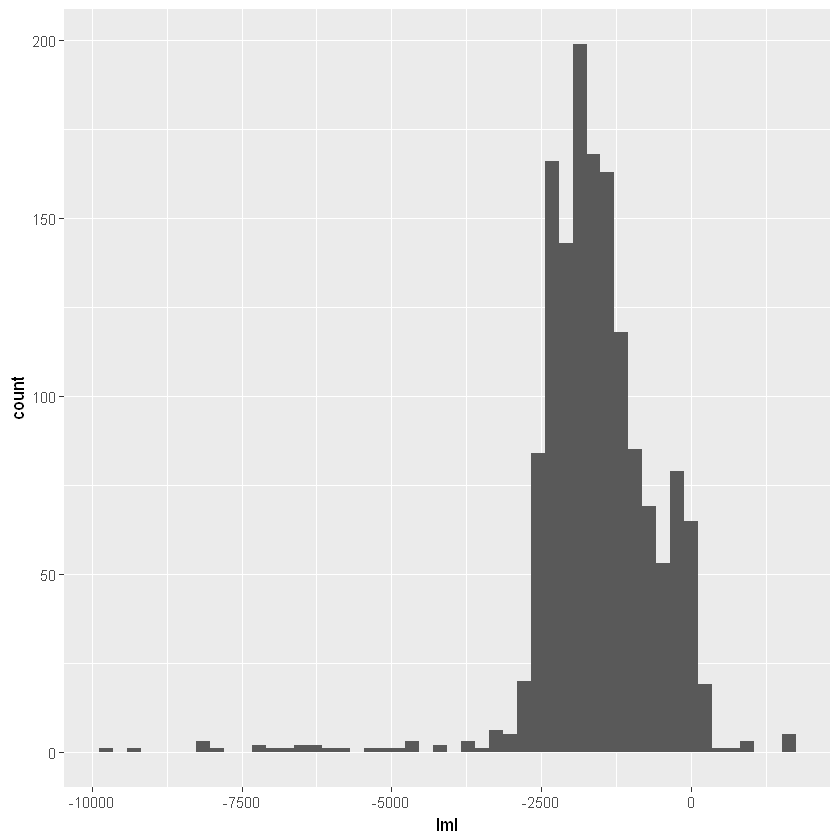

In [122]:
lmls_prior_f %>% 
            filter(scenario == 'Sales') %>%
            filter(lml > -10000) %>%
            filter(lml > lo_bound & lml < up_bound) %>%
            ggplot(aes(lml)) +
            geom_histogram(bins=50)

lmls_prior_f %>% 
            filter(scenario == 'Sales') %>%
            filter(lml <= -10000) %>%
            filter(lml > lo_bound & lml < up_bound) %>%
            nrow

lmls_prior_f %>% 
            filter(scenario == 'Sales') %>%
            filter(lml > lo_bound & lml < up_bound) %>%
            nrow

41/1521

# Test

In [103]:
d <- data.frame(x1=rnorm(10),
                 x2=rnorm(10))
cor(d)

,x1,x2
x1,1.00000000,0.05384463
x2,0.05384463,1.00000000


In [104]:
d

x1,x2
-0.8216129,-0.78259914
0.5764604,-1.56828936
1.0962754,-0.46722302
1.7868327,1.59631519
-0.8088734,-1.83291970
-0.6212976,1.57716736
1.4642643,-1.70107038
0.9236739,-1.09336395
-0.4044139,0.03809182
0.2899331,-0.75517502


In [119]:
lmls_prior_f %>%
            filter(lml <= -10000) %>%
            filter(lml > lo_bound & lml < up_bound) %>%
            group_by(scenario) %>%
            summarize(count = length(lml))

lmls_prior_f %>% 
            filter(lml > lo_bound & lml < up_bound) %>%
            group_by(scenario) %>%
            summarize(count = length(lml))

scenario,count
FB Friends,4
Sales,41


scenario,count
FB Friends,1548
Gym members,1608
Rain,1605
Salary,1565
Sales,1521
Temperature,1610
